In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')

In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4114,ham,Sorry. You never hear unless you book it. One ...,NaN,NaN,NaN
5203,ham,Me fine..absolutly fine,NaN,NaN,NaN
2095,ham,"Probably, want to pick up more?",NaN,NaN,NaN
5536,ham,Aiyah ok wat as long as got improve can alread...,NaN,NaN,NaN
1078,ham,Convey my regards to him,NaN,NaN,NaN


In [4]:
print(df.shape)

(5572, 5)


### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Since last 3 columns have very less non-null values, we can drop them

In [7]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True,axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.sample(5)

,v1,v2
2615,ham,2marrow only. Wed at &lt;#&gt; to 2 aha.
26,ham,Lol your always so convincing.
151,ham,Yup i thk cine is better cos no need 2 go down...
3208,ham,Havent mus ask if u can 1st wat. Of meet 4 lun...
580,ham,Huh so early.. Then Ì_ having dinner outside i...


In [10]:
df.rename(columns={'v1':'label', 'v2':'message'},inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['label']=encoder.fit_transform(df['label'])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.sample(5)

,label,message
1391,0,"Haha just kidding, papa needs drugs"
5221,0,"Jane babes not goin 2 wrk, feel ill after lst ..."
4743,0,"\Thinking of u ;) x\"""""
3391,0,What r u cooking me for dinner?
1479,0,My trip was ok but quite tiring lor. Uni start...


In [14]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
df.sample(10)

,label,message
1257,0,Am also doing in cbe only. But have to pay.
4542,0,I've been trying to reach him without success
2408,0,Dear where you will be when i reach there
3383,1,FREE MSG:We billed your mobile number by mista...
3291,0,Dear good morning how you feeling dear
4998,0,"Hmph. Go head, big baller."
5289,0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...
4714,0,S:)8 min to go for lunch:)
3733,0,"4 tacos + 1 rajas burrito, right?"
2669,1,we tried to contact you re your response to ou...


In [19]:
## Exploratory Data Analysis

In [20]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [21]:
x,y=df['label'].value_counts()
print('Ham:',x)
print('Spam:',y)

Ham: 4516
Spam: 653


([<matplotlib.patches.Wedge at 0x1a5063faf00>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63%')])

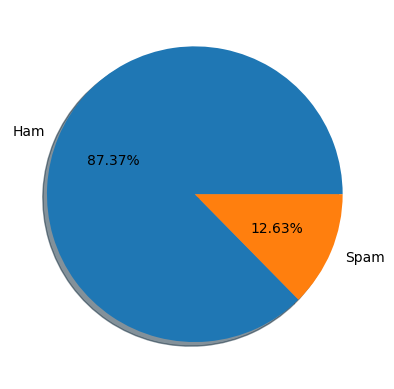

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f%%',shadow=True)

In [23]:
# We have less nummber of spam messages compared to ham messages in the dataset
# imbalance in the data.

In [24]:
# To count the number of characters, words and sentences.

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters']=df['message'].apply(len)

In [28]:
df.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df.sample(5)

,label,message,num_characters,num_words,num_sentences
802,1,FREE for 1st week! No1 Nokia tone 4 ur mobile ...,162,31,3
589,0,"I'm in a meeting, call me later at",34,10,1
4267,0,Hey so whats the plan this sat?,32,8,1
569,0,WOT U WANNA DO THEN MISSY?,26,8,1
1792,1,WIN: We have a winner! Mr. T. Foley won an iPo...,132,29,3


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# For ham messages
df[df['label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# For spam messages
df[df['label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
# one clear observation is that spam messages have more number of characters, words and sentences compared to ham messages.

In [38]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

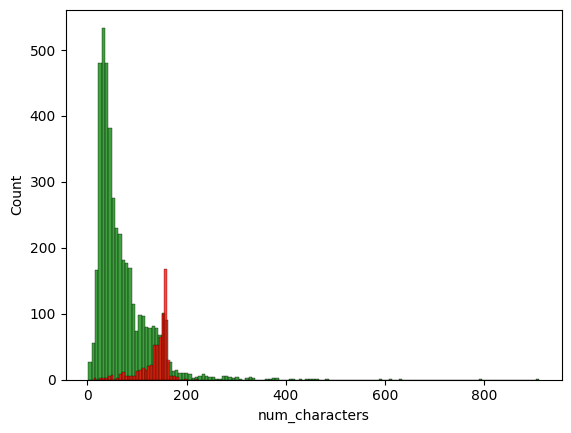

In [39]:
sns.histplot(df[df['label']==0]['num_characters'],color='green')
sns.histplot(df[df['label']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

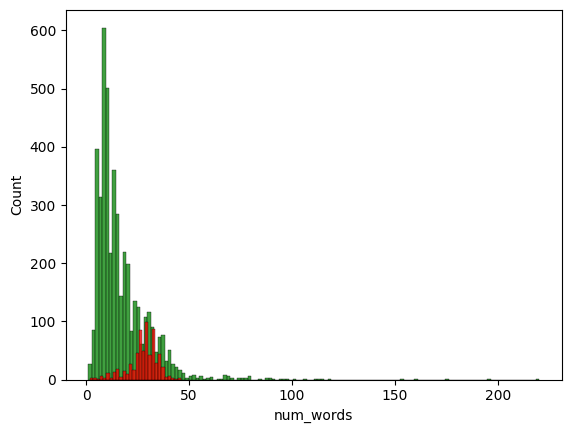

In [40]:
sns.histplot(df[df['label']==0]['num_words'],color='green')
sns.histplot(df[df['label']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

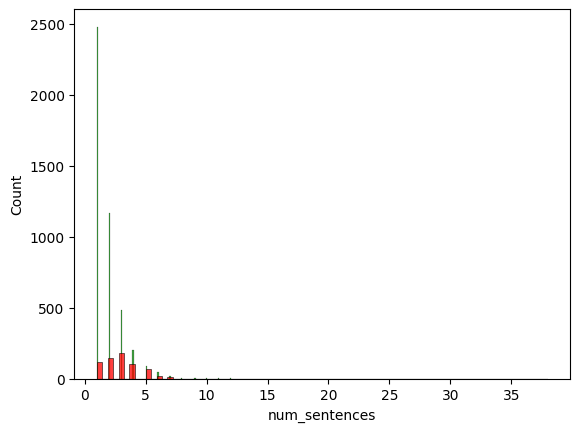

In [41]:
sns.histplot(df[df['label']==0]['num_sentences'],color='green')
sns.histplot(df[df['label']==1]['num_sentences'],color='red')

<Figure size 900x300 with 0 Axes>

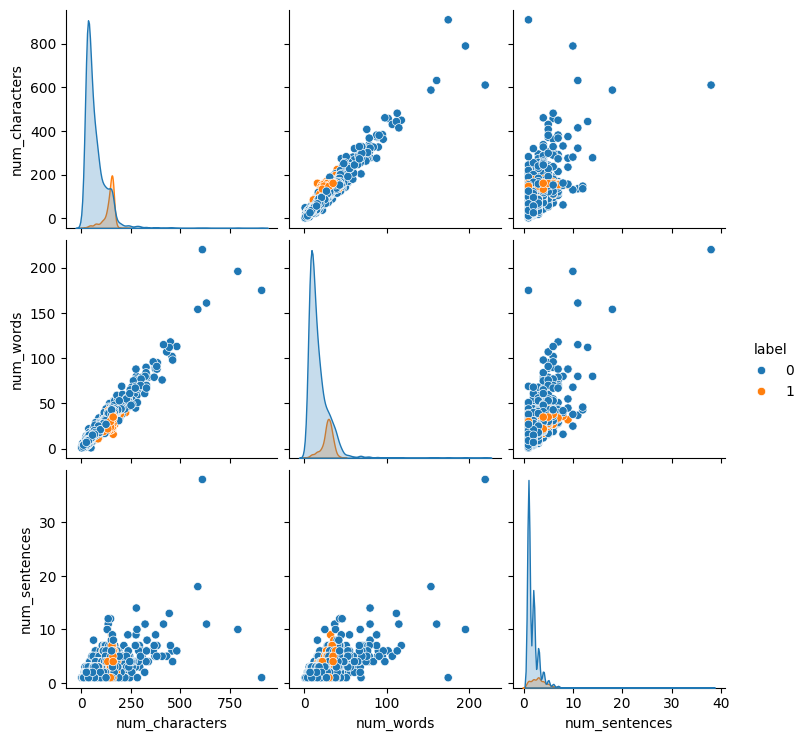

In [42]:
plt.figure(figsize=(9,3))
sns.pairplot(df,hue='label')

In [43]:
df.corr

<bound method DataFrame.corr of       label                                            message  \
0         0  Go until jurong point, crazy.. Available only ...   
1         0                      Ok lar... Joking wif u oni...   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3         0  U dun say so early hor... U c already then say...   
4         0  Nah I don't think he goes to usf, he lives aro...   
...     ...                                                ...   
5567      1  This is the 2nd time we have tried 2 contact u...   
5568      0              Will Ì_ b going to esplanade fr home?   
5569      0  Pity, * was in mood for that. So...any other s...   
5570      0  The guy did some bitching but I acted like i'd...   
5571      0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  
0                111         24              2  
1                 29          8              2  
2                155        

### Data Preprocessing

#### Define a Function which will perform the text preprocessing tasks.
1. convert the text in lower case
2. convert it into tokens
3. remove the special characters and keep only alphanumerics in the list
4. remove the stopwords(unnecessary words) and punctuations
5. stemming (same meaning words are converted to the root form)

In [44]:
import string 

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [46]:
df['message'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [47]:
transform_text('Even my brother is not like to speak with me. They treat me like aids patent.')

'even brother like speak treat like aid patent'

In [3]:
df['transformed_text']=df['message'].apply(transform_text)

NameError: name 'df' is not defined

In [ ]:
df.head()

: 

In [ ]:
! pip install wordcloud

: 

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

: 

In [ ]:
spam_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

: 

### Most common spam messages 

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

: 

In [ ]:
ham_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))

: 

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

: 

In [ ]:
spam_corpus=[]
for msg in (df[df['label']==1]['transformed_text'].tolist()) :
    for word in msg.split():
        spam_corpus.append(word)

: 

In [ ]:
len(spam_corpus)

: 

In [ ]:
from collections import Counter
plt.plot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation=45)


: 

In [ ]:
ham_corpus=[]
for msg in (df[df['label']==0]['transformed_text'].tolist()) :
    for word in msg.split():
        ham_corpus.append(word)

: 

In [ ]:
len(ham_corpus)

: 

In [ ]:
from collections import Counter
plt.plot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation=45)


: 

### Model Building

#### We are using Naive Bayes model for our spam classifier as it's a textual data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

: 

In [ ]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

: 

In [ ]:
X.shape

: 

In [ ]:
X

: 

In [ ]:
Y=df['label'].values

: 

In [ ]:
Y.shape

: 

In [ ]:
Y

: 

In [ ]:
from sklearn.model_selection import train_test_split

: 

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

: 

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

: 

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

: 

In [ ]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

: 

In [ ]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

: 

In [ ]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

: 

##### since precision score matters here therefore we will choose multinomial naive bayse for our project

In [ ]:
# tfidf vectorizer and MultinomialNB gives the best accuracy and precision score.

: 

#### Let's try some other classification models to check their precision and accuracy.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

: 

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

: 

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

: 

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

: 

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

: 

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

: 

In [ ]:
performance_df

: 

In [ ]:
# From the above table, we can see that MultinomialNB gives the best accuracy and precision score.

: 

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

: 

In [ ]:
performance_df1

: 

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

: 

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

: 